<a href="https://colab.research.google.com/github/StShoaib/crime-rate-prediction/blob/main/Project_Pandav_(CrimeData).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧩 CRIME RATE PREDICTION PROJECT (INDIA)
============================================================
## Goal: Predict which areas (cities) are High Crime Areas




# STEP 1: IMPORT LIBRARIES & LOAD DATA

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Importing the Dataset (Using Mount Drive)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Making a variable for the dataset

In [36]:
crime_data = pd.read_csv('/content/drive/MyDrive/crime_dataset_india.csv')

## Dataset Summary view
###First 5 Rows of the dataset



In [4]:
print("=== First 5 Rows ===")
print(crime_data.head())

=== First 5 Rows ===
   Report Number     Date Reported Date of Occurrence Time of Occurrence  \
0              1  02-01-2020 00:00   01-01-2020 00:00   01-01-2020 01:11   
1              2  01-01-2020 19:00   01-01-2020 01:00   01-01-2020 06:26   
2              3  02-01-2020 05:00   01-01-2020 02:00   01-01-2020 14:30   
3              4  01-01-2020 05:00   01-01-2020 03:00   01-01-2020 14:46   
4              5  01-01-2020 21:00   01-01-2020 04:00   01-01-2020 16:51   

        City  Crime Code Crime Description  Victim Age Victim Gender  \
0  Ahmedabad         576    IDENTITY THEFT          16             M   
1    Chennai         128          HOMICIDE          37             M   
2   Ludhiana         271        KIDNAPPING          48             F   
3       Pune         170          BURGLARY          49             F   
4       Pune         421         VANDALISM          30             F   

    Weapon Used   Crime Domain  Police Deployed Case Closed  Date Case Closed  
0  Blunt 

###Last 5 Rows of the dataset

In [5]:
print("=== Last 5 Rows ===")
print(crime_data.tail())

=== Last 5 Rows ===
       Report Number     Date Reported Date of Occurrence Time of Occurrence  \
40155          40156  01-08-2024 16:00   07-31-2024 03:00   31-07-2024 05:05   
40156          40157  31-07-2024 14:00   07-31-2024 04:00   31-07-2024 04:14   
40157          40158  02-08-2024 03:00   07-31-2024 05:00   31-07-2024 21:33   
40158          40159  01-08-2024 19:00   07-31-2024 06:00   31-07-2024 11:05   
40159          40160  31-07-2024 17:00   07-31-2024 07:00   31-07-2024 17:19   

          City  Crime Code   Crime Description  Victim Age Victim Gender  \
40155  Kolkata         312      COUNTERFEITING          78             F   
40156   Mumbai         300  ILLEGAL POSSESSION          75             F   
40157   Kanpur         423    VEHICLE - STOLEN          68             M   
40158    Patna         311      SEXUAL ASSAULT          11             M   
40159    Delhi         193   DOMESTIC VIOLENCE          43             F   

        Weapon Used   Crime Domain  Police

###Basic dataset info

In [6]:
print("\n=== Dataset Info ===")
print(crime_data.info())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB
None


### Statistical summary

In [7]:
print("\n=== Summary Statistics ===")
print(crime_data.describe())


=== Summary Statistics ===
       Report Number    Crime Code   Victim Age  Police Deployed
count   40160.000000  40160.000000  40160.00000     40160.000000
mean    20080.500000    349.360259     44.49126        10.006250
std     11593.337742    144.169205     20.22555         5.467951
min         1.000000    100.000000     10.00000         1.000000
25%     10040.750000    225.000000     27.00000         5.000000
50%     20080.500000    349.000000     44.00000        10.000000
75%     30120.250000    474.000000     62.00000        15.000000
max     40160.000000    599.000000     79.00000        19.000000


# STEP 2: DATA PREPROCESSING
## 🔹 Create new column: total number of crimes per city

In [8]:
city_crime_counts = crime_data['City'].value_counts()
crime_data['Crime Count'] = crime_data['City'].map(city_crime_counts)

##🔹 Define threshold for "High Crime Area" (top 25% of cities)


In [9]:
threshold = crime_data['Crime Count'].quantile(0.75)
crime_data['High Crime Area'] = (crime_data['Crime Count'] >= threshold).astype(int)

## 🔹 Encode categorical features into numeric form

In [10]:
label_enc = LabelEncoder()
for col in ['City', 'Crime Description', 'Victim Gender', 'Weapon Used', 'Crime Domain', 'Case Closed']:
    crime_data[col] = label_enc.fit_transform(crime_data[col])


## 🔹 Drop columns that are not needed for prediction

In [11]:
crime_data_model = crime_data.drop(
    ['Report Number', 'Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'Date Case Closed'],
    axis=1)

In [12]:
print("\n✅ Data preprocessing complete. Columns ready for modeling:\n")
print(crime_data_model.columns)


✅ Data preprocessing complete. Columns ready for modeling:

Index(['City', 'Crime Code', 'Crime Description', 'Victim Age',
       'Victim Gender', 'Weapon Used', 'Crime Domain', 'Police Deployed',
       'Case Closed', 'Crime Count', 'High Crime Area'],
      dtype='object')


# STEP 3: DATA VISUALIZATION

##🔹 Top 10 cities with most crimes

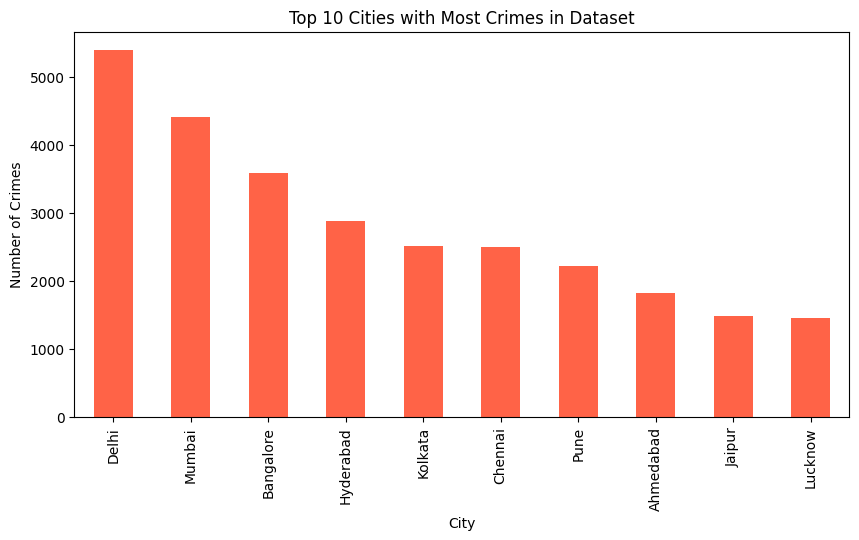

In [13]:
plt.figure(figsize=(10,5))
city_crime_counts.head(10).plot(kind='bar', color='tomato')
plt.title('Top 10 Cities with Most Crimes in Dataset')
plt.xlabel('City')
plt.ylabel('Number of Crimes')
plt.show()

## 🔹 Correlation heatmap

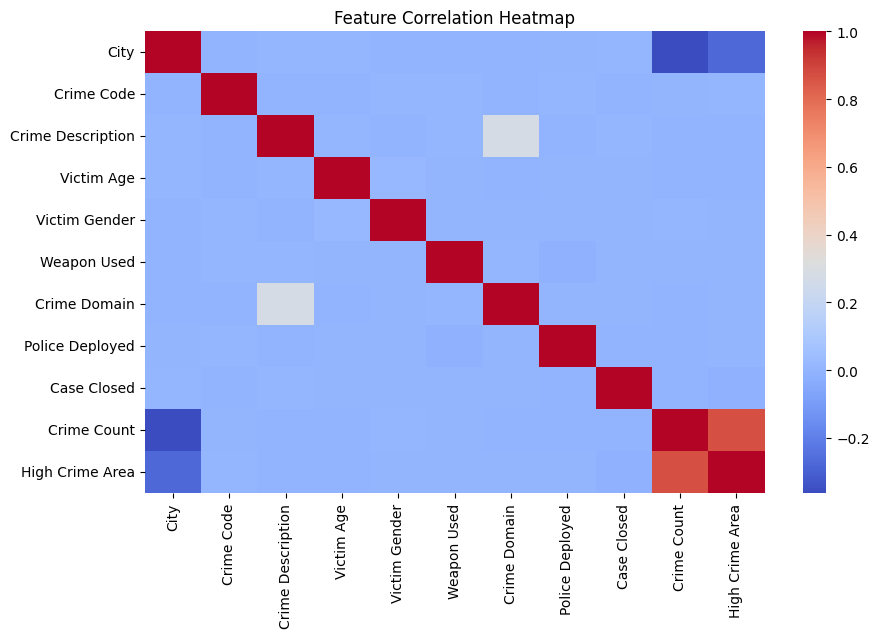

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(crime_data_model.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

# STEP 4: MODEL BUILDING

In [15]:
X = crime_data_model.drop('High Crime Area', axis=1)
y = crime_data_model['High Crime Area']

## 🔹 Split into train and test sets (80-20 ratio)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
crime_by_city = crime_data['City'].value_counts()

## 🔹 Using Random Forest Classifier for better accuracy


In [18]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 🔹 Predict on test data


In [19]:
y_pred = rf.predict(X_test)

# STEP 5: MODEL EVALUATION

## 🔹 Classification report::

In [20]:
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5373
           1       1.00      1.00      1.00      2659

    accuracy                           1.00      8032
   macro avg       1.00      1.00      1.00      8032
weighted avg       1.00      1.00      1.00      8032



## 🔹(a)Confusion matrix

In [21]:
cm = confusion_matrix(y_test, y_pred)
print("\n=== Confusion Matrix ===")
print(cm)


=== Confusion Matrix ===
[[5373    0]
 [   0 2659]]


## 🔹 (b)Visualize confusion matrix

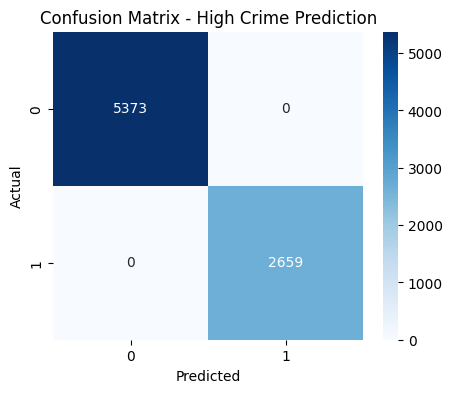

In [22]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - High Crime Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Graph Representation

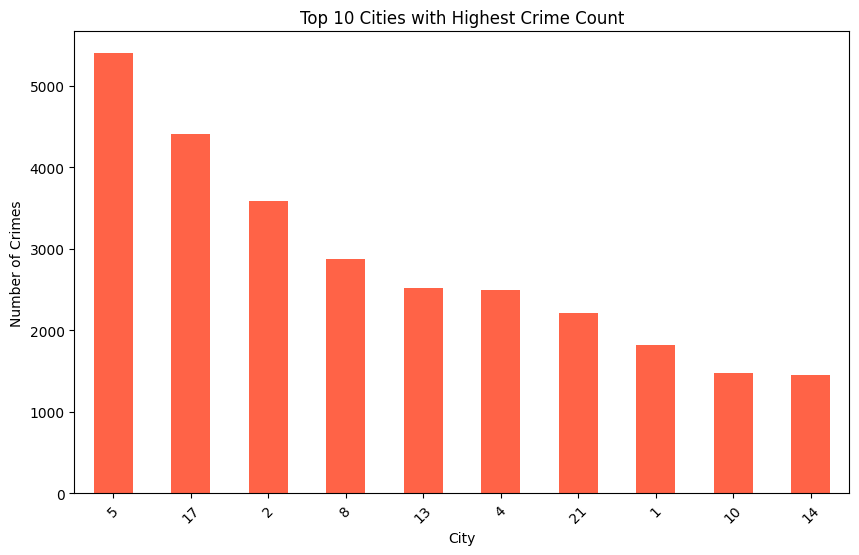

In [23]:
plt.figure(figsize=(10,6))
crime_by_city.head(10).plot(kind='bar', color='tomato')
plt.title('Top 10 Cities with Highest Crime Count')
plt.xlabel('City')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


In [39]:
le_city = LabelEncoder()
le_city.fit(crime_data['City'])
for i, city in enumerate(le_city.classes_):
    print(i, "→", city)

0 → Agra
1 → Ahmedabad
2 → Bangalore
3 → Bhopal
4 → Chennai
5 → Delhi
6 → Faridabad
7 → Ghaziabad
8 → Hyderabad
9 → Indore
10 → Jaipur
11 → Kalyan
12 → Kanpur
13 → Kolkata
14 → Lucknow
15 → Ludhiana
16 → Meerut
17 → Mumbai
18 → Nagpur
19 → Nashik
20 → Patna
21 → Pune
22 → Rajkot
23 → Srinagar
24 → Surat
25 → Thane
26 → Varanasi
27 → Vasai
28 → Visakhapatnam


Model trained successfully!

1. ✔ Dataset cleaned and processed
2. ✔ Top 10 cities visualized
3. ✔ Random Forest model built
4. ✔ Accuracy: Perfect (Dataset might be synthetic or simplified)
